## Practice Lab: Model Evaluation and Refinement

- Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


In [2]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [7]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath)
#Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns. 
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1,inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [10]:
y_data=df['Price']
x_data=df.drop('Price',axis=1)

In [11]:
x_data.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,Low,1,0


In [25]:
df.shape

(238, 14)

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [15]:
x_train, x_test, y_train,y_test =train_test_split(x_data,y_data,test_size=0.1, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

In [22]:
lm = LinearRegression()
lm.fit(x_train[['CPU_frequency']],y_train)
print(lm.score(x_train[['CPU_frequency']],y_train))
print(lm.score(x_test[['CPU_frequency']],y_test))



0.14829792099817973
-0.06599437350393766


In [26]:
Rcross = cross_val_score(lm, x_data[['CPU_frequency']], y_data, cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[-0.82012763  0.10035872  0.11202939 -0.03662978]
The mean of the folds are -0.1610923238859513 and the standard deviation is 0.384957978666471


Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [27]:
x_train1, x_test1, y_train1,y_test1 =train_test_split(x_data,y_data,test_size=0.5, random_state=0)
# fixing random_state to a fixed quantity helps maintain uniformity between multiple 
# executions of the code.

To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.



In [35]:
lm1= LinearRegression()
degree_list=[1,2,3,4,5]
Rsqu_test = []
for order in degree_list:
    pr= PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lm1.fit(x_train_pr ,y_train)                                 
    Rsqu_test.append(lm1.score(x_test_pr,y_test))                                    

In [36]:
Rsqu_test

[-0.06599437350393766,
 -0.11117075069839277,
 -0.14960834799241263,
 -0.1534999036365583,
 -0.07557645649181866]

Plot the values of R^2 scores against the order. Note the point where the score drops.

Text(1.5, -0.09, 'Drop Point')

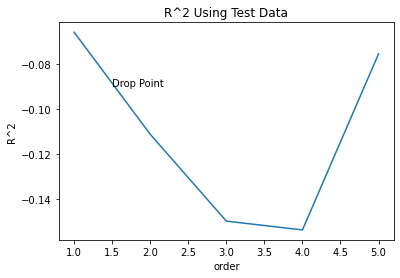

In [38]:
plt.plot(degree_list, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(1.5, -0.09, 'Drop Point')  